In [9]:
from google.cloud import bigquery
from google.oauth2 import service_account
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
credentials = service_account.Credentials.from_service_account_file('C:/Users/Helen.Tian/Downloads/YETI Google Analytics-45214aca550b.json')# PATH IN YOUR COMPUTER
project_id = 'enduring-hue-184016'   
client = bigquery.Client(credentials= credentials,project=project_id)

In [10]:
query_job = client.query("""SELECT eventAction FROM `enduring-hue-184016.121992452.ga_2018_1_5_events` WHERE eventCategory = 'pdp' GROUP BY eventAction""")
results = query_job.result()
results.to_dataframe()

,eventAction
0,photo interaction
1,recommendation strand
2,read and write reviews
3,review visible
4,back in stock notification
5,truck fit
6,product color view
7,low stock visible
8,breadcrumbs
9,product features


In [11]:
# There are 11 different eventActions. 
# Back in stock/coming soon notification need to consider if the product is available now?
# Truck fit only show in Coolers

In [12]:
# time period: 2018-01-01 to 2018-05-31

In [13]:
query_job = client.query("SELECT * FROM `enduring-hue-184016.121992452.results_20180614_110944` ")
results = query_job.result()
df = results.to_dataframe()
#df = df.drop_duplicates()

In [7]:
df.head()

,A_date,A_eventAction,A_visitorId,A_test,B_eventAction,B_eventLab
0,2018-05-30,back in stock notification,5648504723038898502,hopper two 30,add to cart,hopper two 30
1,2018-05-30,back in stock notification,1369319254340004256,hopper two 30,add to cart,hopper two 30
2,2018-05-30,back in stock notification,1057054936983014911,hopper two 30,add to cart,hopper two 30
3,2018-05-31,back in stock notification,6613959718485270575,hopper two 30,add to cart,hopper two 30
4,2018-05-31,back in stock notification,1369319254340004256,hopper two 30,add to cart,hopper two 30


In [8]:
# numbers of customers (visitors who add products to cart)
len(list(set(df.A_visitorId))) 

378771

In [9]:
# numbers of "add_to_cart"
cart = df.groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [103]:
cart.head()

A_date      A_visitorId          A_test                 
2018-01-01  1000336320415534046  tundra 45                  10
            1001613940042162041  rambler bottle chug cap     1
            1004208637159831629  rambler 20 oz tumbler       9
            1006959207230664714  rambler 30 oz tumbler      15
            100712582247722762   rambler 20 oz tumbler       1
Name: B_eventAction, dtype: int64

In [104]:
len(cart) # numbers of add_to_cart (has series of actions before) after filtering and grouping by

520644

In [105]:
##################################################### photo interaction
photo = df[df.A_eventAction == 'photo interaction']

In [106]:
photo = photo.groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [107]:
per_p = len(photo)/len(cart)

In [108]:
p=photo.to_frame().reset_index()

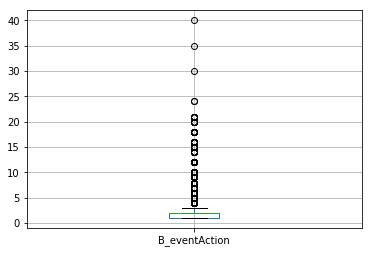

In [205]:
p.boxplot(column = 'B_eventAction')

In [206]:
np.mean(p.B_eventAction)

1.7804772889914169

In [207]:
p.B_eventAction.describe()

count    224979.000000
mean          1.780477
std           1.067019
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          40.000000
Name: B_eventAction, dtype: float64

In [208]:
##################################################### read and write reviews

In [209]:
review = df[df.A_eventAction == 'read and write reviews']

In [210]:
review = review.groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [211]:
per_r = len(review)/len(cart)

In [212]:
r=review.to_frame().reset_index()

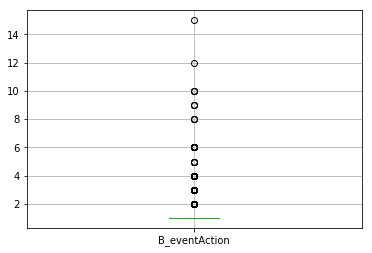

In [213]:
r.boxplot(column = 'B_eventAction')

In [302]:
np.mean(r.B_eventAction)

1.233035294117647

In [214]:
r.B_eventAction.describe()

count    10625.000000
mean         1.233035
std          0.615974
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: B_eventAction, dtype: float64

In [215]:
##################################################### product features

In [216]:
feature = df[df.A_eventAction == 'product features']

In [217]:
feature = feature.groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [218]:
per_f = len(feature)/len(cart)

In [219]:
f=feature.to_frame().reset_index()

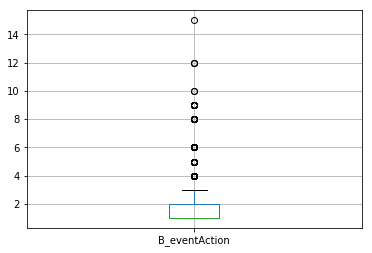

In [220]:
f.boxplot(column = 'B_eventAction')

In [303]:
np.mean(f.B_eventAction)

1.3481442470271918

In [221]:
f.B_eventAction.describe()

count    36077.000000
mean         1.348144
std          0.712949
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: B_eventAction, dtype: float64

In [222]:
##################################################### product color view

In [223]:
color = df[df.A_eventAction == 'product color view']

In [224]:
color = color.groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [225]:
per_c = len(color)/len(cart)

In [226]:
c=color.to_frame().reset_index()

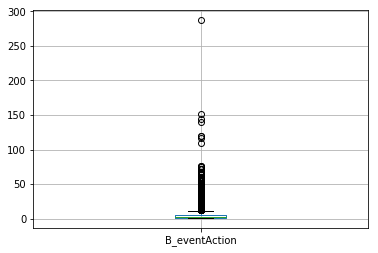

In [227]:
c.boxplot(column = 'B_eventAction')

In [304]:
np.mean(c.B_eventAction)

3.605788752561579

In [228]:
c.B_eventAction.describe()

count    421127.000000
mean          3.605789
std           3.406972
min           1.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         287.000000
Name: B_eventAction, dtype: float64

In [229]:
##################################################### recommendation strand

In [230]:
reco = df[df.A_eventAction == 'recommendation strand']

In [231]:
reco = reco.groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [232]:
per_re = len(reco)/len(cart)

In [233]:
re=reco.to_frame().reset_index()

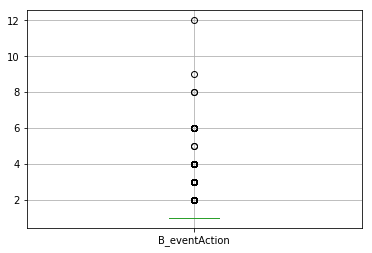

In [234]:
re.boxplot(column = 'B_eventAction')

In [305]:
np.mean(re.B_eventAction)

1.1182705046368782

In [235]:
re.B_eventAction.describe()

count    24909.000000
mean         1.118271
std          0.423702
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: B_eventAction, dtype: float64

In [236]:
##################################################### review visible

In [237]:
visi = df[df.A_eventAction == 'review visible']

In [238]:
visi = visi .groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [239]:
per_v = len(visi)/len(cart)

In [240]:
v=visi.to_frame().reset_index()

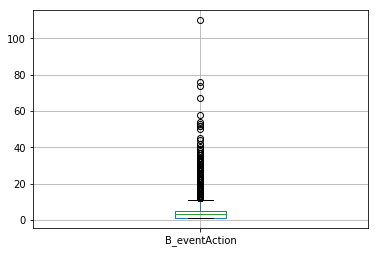

In [241]:
v.boxplot(column = 'B_eventAction')

In [306]:
np.mean(v.B_eventAction)

4.361726571475463

In [242]:
v.B_eventAction.describe()

count    6093.000000
mean        4.361727
std         5.556679
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       110.000000
Name: B_eventAction, dtype: float64

In [243]:
##################################################### breadcrumbs

In [244]:
breadcrumbs = df[df.A_eventAction == 'breadcrumbs']

In [245]:
breadcrumbs = breadcrumbs .groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [246]:
per_b = len(breadcrumbs)/len(cart)

In [247]:
b=breadcrumbs.to_frame().reset_index()

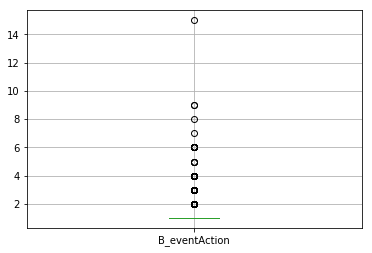

In [248]:
b.boxplot(column = 'B_eventAction')

In [307]:
np.mean(b.B_eventAction)

1.1451654052215325

In [255]:
b.B_eventAction.describe()

count    11759.000000
mean         1.145165
std          0.475385
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: B_eventAction, dtype: float64

In [256]:
#####plot######

In [257]:
data = [per_p, per_c, per_r, per_f, per_re, per_v, per_b]

In [258]:
data

[0.4321167630857169,
 0.808857876015089,
 0.020407418504774857,
 0.06929302940204823,
 0.04784267176804112,
 0.011702814207020537,
 0.022585490277425648]

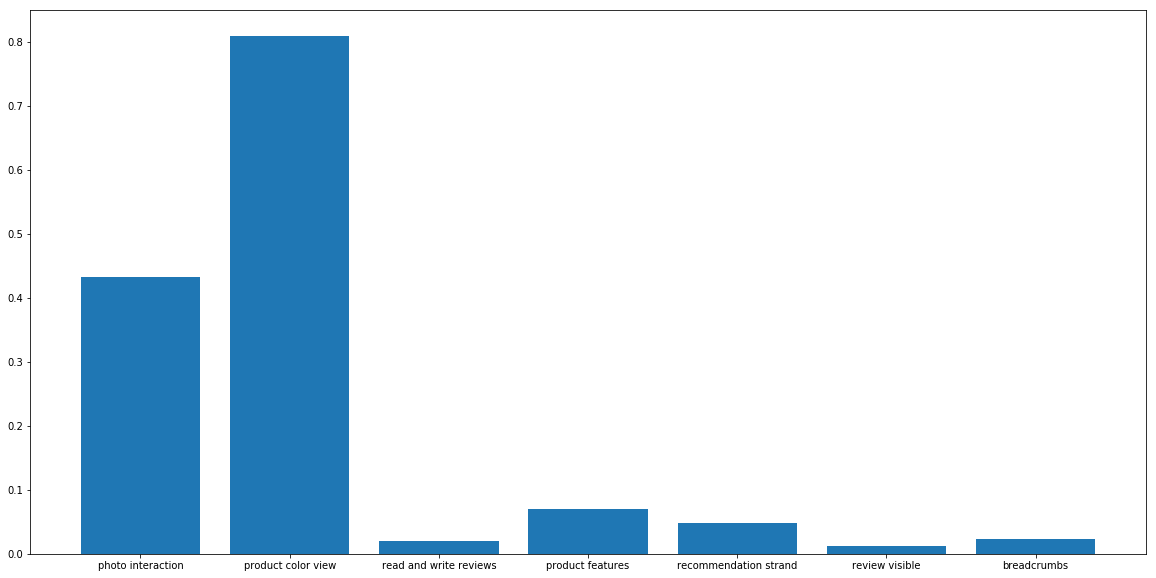

In [259]:
bars = ('photo interaction', 'product color view', 'read and write reviews', 'product features', 'recommendation strand','review visible',  'breadcrumbs')
plt.figure(figsize=(20,10))
plt.bar(range(len(data)), height = data)
plt.xticks(range(len(data)), bars)
#plt.title("Percentage of ")
plt.show()


In [260]:
###############################################truck fit

In [261]:
q=df[df['A_test'].str.contains("tundra") | df['A_test'].str.contains("hopper") | df['A_test'].str.contains("roadie")]
cart_coolers=q[q['A_test'] != 'tundra dividers']

In [262]:
cart_coolers = cart_coolers.groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [263]:
len(cart_coolers)

98227

In [268]:
cart_coolers.head()

A_date      A_visitorId          A_test        
2018-01-01  1000336320415534046  tundra 45         10
            1007381634444056161  roadie 20          2
            1080320225058657095  tundra 50          6
            1084326506127876184  hopper flip 18     1
            1163883877564976497  tundra 75          1
Name: B_eventAction, dtype: int64

In [269]:
truck = df[df.A_eventAction == 'truck fit']

In [270]:
truck = truck.groupby(['A_date','A_visitorId','A_test'])['B_eventAction'].count()

In [271]:
truck.head()

A_date      A_visitorId          A_test   
2018-01-01  1000336320415534046  tundra 45    8
            2348891798648826045  tundra 65    9
            2610660417433360100  roadie 20    3
            2932041631803270601  tundra 65    7
            3633021277088446939  roadie 20    8
Name: B_eventAction, dtype: int64

In [272]:
per_t = len(truck)/len(cart_coolers)

In [273]:
per_t

0.11093691143982816

In [274]:
t=truck.to_frame().reset_index()

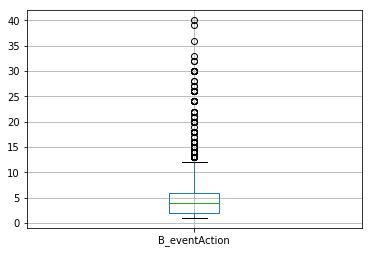

In [275]:
t.boxplot(column = 'B_eventAction')

In [278]:
np.mean(t.B_eventAction)

4.341378361016794

In [276]:
t.B_eventAction.describe()

count    10897.000000
mean         4.341378
std          3.455986
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         40.000000
Name: B_eventAction, dtype: float64

In [ ]:
bars = ('photo interaction', 'product color view', 'read and write reviews', 'product features', 'recommendation strand','review visible',  'breadcrumbs')


In [ ]:
##########################################################################################################################
##########################################################################################################################

In [ ]:
# all actions

In [ ]:
# Because data table is too large to open. Just write down the result from BigQuery execution

In [291]:
# Number of visitors:
# SELECT count(DISTINCT visitorid) FROM `enduring-hue-184016.121992452.ga_2018_1_5_events` where eventCategory = 'pdp'
VISITOR = 3053155

In [279]:
# Overall numbers of looking: 
# SELECT date, visitorId,Count(eventAction) FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] WHERE eventCategory = 'pdp' GROUP BY date, visitorId
OVERALL = 3993949

In [292]:
# average numbers of serve YETI websites:
OVERALL/VISITOR

1.3081383028375566

In [293]:
# photo interaction
# SELECT Count(eventAction) FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] WHERE eventAction = 'photo interaction' GROUP BY date, visitorId
PHOTO = 2346923
avg_p = 2.379

In [294]:
# product color view
# SELECT Count(eventAction) FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] WHERE eventAction = 'product color view' GROUP BY date, visitorId
COLOR = 3116766
avg_c = 3.932

In [295]:
# read and write reviews
# SELECT Count(eventAction) FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] WHERE eventAction = 'read and write reviews' GROUP BY date, visitorId
REVIEW = 101278
avg_review = 1.2163

In [296]:
# product features
# SELECT Count(eventAction) FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] WHERE eventAction = 'product features' GROUP BY date, visitorId
FEATURE = 394127
avg_feature = 1.50

In [297]:
# recommendation strand
# SELECT Count(eventAction) FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] WHERE eventAction = 'recommendation strand' GROUP BY date, visitorId
RECOMMEN = 521966
avg_recommen = 1.143

In [298]:
# review visible
# SELECT Count(eventAction) FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] WHERE eventAction = 'review visible' GROUP BY date, visitorId
VISI = 74477
avg_visi = 4.151

In [299]:
# breadcrumbs
# SELECT Count(eventAction) FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] WHERE eventAction = 'breadcrumbs' GROUP BY date, visitorId
BREADCRUMB = 127764
avg_bread = 1.183

In [300]:
data1 = [PHOTO/OVERALL, COLOR/OVERALL, REVIEW/OVERALL,FEATURE/OVERALL, RECOMMEN/OVERALL, VISI/OVERALL , BREADCRUMB/OVERALL]

In [301]:
data1

[0.5876196716583011,
 0.7803720077547309,
 0.025357860102870618,
 0.09868102972772061,
 0.13068920008743226,
 0.018647458943516805,
 0.03198939195267641]

In [ ]:
avg_All = [avg_p, avg_c, avg_review, avg_feature, avg_recommen, avg_visi, avg_bread]

In [1]:
##########################################################################################################################
##########################################################################################################################

In [ ]:
# Not add_to_cart actions II (just actions from visitors who did not add anything to cart)

In [2]:
# photo interaction
#SELECT AVG(Q) FROM (SELECT COUNT(A.EVENTACTION) AS Q FROM (
#SELECT A.date, A.visitorID, A.EVENTACTION FROM (SELECT date, VisitorId, eventAction FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventaction = 'photo interaction') A left join
#(SELECT date, VIsitorId FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventAction='add to cart') B
#ON A.date=B.date and A.viSitorId = B.visItorId where B.date is null) GROUP BY a.date, a.visitorId)
avg_II_Photo = 2.311247729795423

In [3]:
# product color view
#SELECT AVG(Q) FROM (SELECT COUNT(A.EVENTACTION) AS Q FROM (
#SELECT A.date, A.visitorID, A.EVENTACTION FROM (SELECT date, VisitorId, eventAction FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventaction = 'product color view') A left join
#(SELECT date, VIsitorId FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventAction='add to cart') B
#ON A.date=B.date and A.viSitorId = B.visItorId where B.date is null) GROUP BY a.date, a.visitorId)
avg_II_Color = 3.711932100130762

In [4]:
# read and write reviews
#SELECT AVG(Q) FROM (SELECT COUNT(A.EVENTACTION) AS Q FROM (
#SELECT A.date, A.visitorID, A.EVENTACTION FROM (SELECT date, VisitorId, eventAction FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventaction = 'read and write reviews') A left join
#(SELECT date, VIsitorId FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventAction='add to cart') B
#ON A.date=B.date and A.viSitorId = B.visItorId where B.date is null) GROUP BY a.date, a.visitorId)
avg_II_Reviews = 1.199357179150862

In [5]:
# product features
#SELECT AVG(Q) FROM (SELECT COUNT(A.EVENTACTION) AS Q FROM (
#SELECT A.date, A.visitorID, A.EVENTACTION FROM (SELECT date, VisitorId, eventAction FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventaction = 'product features') A left join
#(SELECT date, VIsitorId FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventAction='add to cart') B
#ON A.date=B.date and A.viSitorId = B.visItorId where B.date is null) GROUP BY a.date, a.visitorId)
avg_II_Features = 1.4873828639096267

In [6]:
# recommendation strand
#SELECT AVG(Q) FROM (SELECT COUNT(A.EVENTACTION) AS Q FROM (
#SELECT A.date, A.visitorID, A.EVENTACTION FROM (SELECT date, VisitorId, eventAction FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventaction = 'recommendation strand') A left join
#(SELECT date, VIsitorId FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventAction='add to cart') B
#ON A.date=B.date and A.viSitorId = B.visItorId where B.date is null) GROUP BY a.date, a.visitorId)
avg_II_Recom = 1.1213252438901504

In [7]:
# review visible
#SELECT AVG(Q) FROM (SELECT COUNT(A.EVENTACTION) AS Q FROM (
#SELECT A.date, A.visitorID, A.EVENTACTION FROM (SELECT date, VisitorId, eventAction FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventaction = 'review visible') A left join
#(SELECT date, VIsitorId FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventAction='add to cart') B
#ON A.date=B.date and A.viSitorId = B.visItorId where B.date is null) GROUP BY a.date, a.visitorId)
avg_II_Visi = 4.028445074502674

In [8]:
# breadcrumbs
#SELECT AVG(Q) FROM (SELECT COUNT(A.EVENTACTION) AS Q FROM (
#SELECT A.date, A.visitorID, A.EVENTACTION FROM (SELECT date, VisitorId, eventAction FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventaction = 'breadcrumbs') A left join
#(SELECT date, VIsitorId FROM [enduring-hue-184016:121992452.ga_2018_1_5_events] where eventAction='add to cart') B
#ON A.date=B.date and A.viSitorId = B.visItorId where B.date is null) GROUP BY a.date, a.visitorId)
avg_II_Breadcrumbs = 1.1532093906907315

In [14]:
avg_II=[avg_II_Photo, avg_II_Color, avg_II_Reviews, avg_II_Features, avg_II_Recom,avg_II_Visi, avg_II_Breadcrumbs]

In [ ]:
##########################################################################################################################
##########################################################################################################################

In [15]:
# all customers' actions (add to cart actions + not add to cart actions I)

In [ ]:
bars = ('photo interaction', 'product color view', 'read and write reviews', 'product features', 'recommendation strand','review visible',  'breadcrumbs')


In [16]:
# photo interaction
#SELECT AVG(Q) FROM ( SELECT COUNT(B_Eventlab) AS Q FROM [enduring-hue-184016:121992452.results_20180614_110944] 
#where A_eventAction = 'photo interaction' group by A_date, a_visitorid )
avg_customer_photo= 1.9942646905073658

In [17]:
# product color view
#SELECT AVG(Q) FROM ( SELECT COUNT(B_Eventlab) AS Q FROM [enduring-hue-184016:121992452.results_20180614_110944] 
#where A_eventAction = 'product color view' group by A_date, a_visitorid )
avg_customer_color= 4.1913104202088896

In [18]:
# read and write reviews
#SELECT AVG(Q) FROM ( SELECT COUNT(B_Eventlab) AS Q FROM [enduring-hue-184016:121992452.results_20180614_110944] 
#where A_eventAction = 'read and write reviews' group by A_date, a_visitorid )
avg_customer_reviews= 1.290611762387942

In [19]:
# product features
#SELECT AVG(Q) FROM ( SELECT COUNT(B_Eventlab) AS Q FROM [enduring-hue-184016:121992452.results_20180614_110944] 
#where A_eventAction = 'product features' group by A_date, a_visitorid )
avg_customer_features= 1.4153062709151754

In [20]:
# recommendation strand
#SELECT AVG(Q) FROM ( SELECT COUNT(B_Eventlab) AS Q FROM [enduring-hue-184016:121992452.results_20180614_110944] 
#where A_eventAction = 'recommendation strand' group by A_date, a_visitorid )
avg_customer_recomm= 1.2199448167126528

In [21]:
# review visible
#SELECT AVG(Q) FROM ( SELECT COUNT(B_Eventlab) AS Q FROM [enduring-hue-184016:121992452.results_20180614_110944] 
#where A_eventAction = 'review visible' group by A_date, a_visitorid )
avg_customer_visi= 4.638854948507593

In [22]:
# breadcrumbs
#SELECT AVG(Q) FROM ( SELECT COUNT(B_Eventlab) AS Q FROM [enduring-hue-184016:121992452.results_20180614_110944] 
#where A_eventAction = 'breadcrumbs' group by A_date, a_visitorid )
avg_customer_breadcrumbs= 1.2348464007336084

In [23]:
avg_customer = [avg_customer_photo,avg_customer_color,avg_customer_reviews,avg_customer_features,avg_customer_recomm,avg_customer_visi,avg_customer_breadcrumbs]